___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)

# Indest Data

In [12]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [13]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [15]:
df.columns = ['Production']

In [16]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


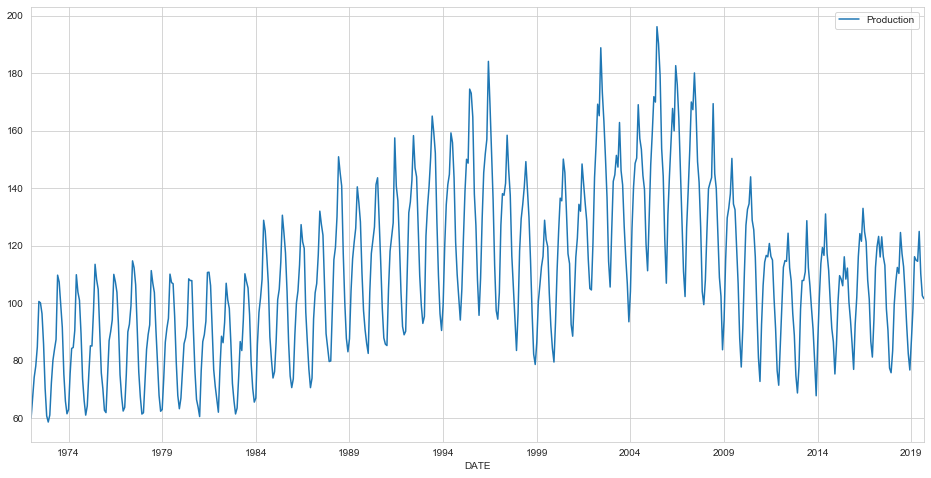

In [20]:
df.plot(figsize=(16,8));

# Preprocessing of Data

## Train Test Split

In [21]:
len(df)

573

In [22]:
test_size = 24

In [23]:
test_ind = len(df) - test_size

In [24]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [25]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [26]:
test

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


## Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [32]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [33]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [34]:
len(generator)

537

In [35]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [38]:
X, y, = generator[0]

In [39]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [41]:
train_scaled.shape

(549, 1)

In [42]:
n_features = train_scaled.shape[1]

In [43]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [45]:
4 * ((1+1)*100+(100**2))

40800

In [46]:
4 * ((100+1)*50+(50**2))

30200

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [52]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [53]:
len(validation_generator)

12

In [54]:
model.fit(x = generator,
          epochs = 20,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 19s 36ms/step - loss: 0.0233 - val_loss: 0.0048
Epoch 2/20
537/537 [==============================] - 16s 29ms/step - loss: 0.0047 - val_loss: 0.0032
Epoch 3/20
537/537 [==============================] - 15s 29ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 4/20
537/537 [==============================] - 16s 29ms/step - loss: 0.0042 - val_loss: 0.0108
Epoch 5/20
537/537 [==============================] - 17s 31ms/step - loss: 0.0041 - val_loss: 0.0055
Epoch 6/20
537/537 [==============================] - 16s 30ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 7/20
537/537 [==============================] - 16s 29ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 8/20
537/537 [==============================] - 15s 27ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 9/20
537/537 [==============================] - 16s 30ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 10/20
537/537 [==============================] - 15s 28ms/step - loss: 0.002

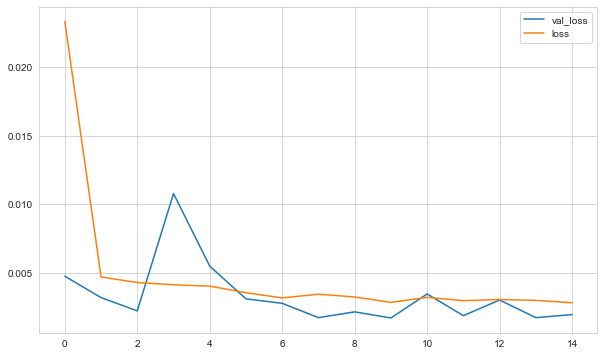

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [61]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    current_pred = model.predict(current_batch)
    
    predictions_scaled.append(current_pred[0]) 
    
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [62]:
predictions_scaled

[array([0.00653684], dtype=float32),
 array([0.00570164], dtype=float32),
 array([0.00471384], dtype=float32),
 array([0.00380426], dtype=float32),
 array([0.00302614], dtype=float32),
 array([0.00239232], dtype=float32),
 array([0.0018782], dtype=float32),
 array([0.00144418], dtype=float32),
 array([0.0010953], dtype=float32),
 array([0.00075437], dtype=float32),
 array([0.00046474], dtype=float32),
 array([0.00020172], dtype=float32)]

In [63]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -7.576457672707205 
mae: 0.3067707406204659 
mse: 0.1069539057651996 
rmse: 0.3270380799925287


## Inverse Transformation and Comparing

In [64]:
predictions = scaler.inverse_transform(predictions_scaled)

In [66]:
compare = test[:12]

In [67]:
compare['Predictions'] = predictions

In [68]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,59.559
2017-11-01,77.438,59.444
2017-12-01,75.812,59.308
2018-01-01,83.434,59.183
2018-02-01,99.490,59.076
2018-03-01,107.315,58.989
2018-04-01,112.431,58.918
2018-05-01,110.354,58.858
2018-06-01,124.584,58.810


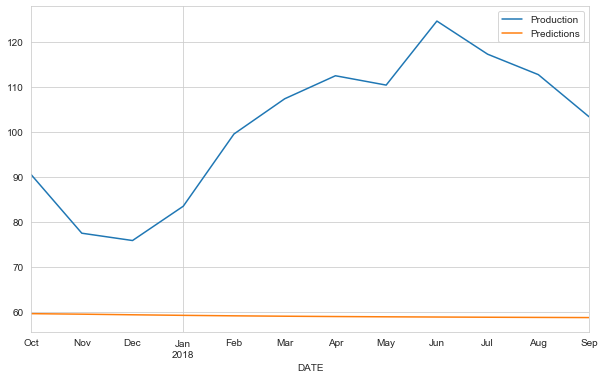

In [69]:
compare.plot()

In [70]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: -7.576457672707205 
mae: 42.18524094860869 
mse: 2022.5061328426573 
rmse: 44.9722818282846


## with "relu" activation function

In [71]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 12, 100)           40800     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [73]:
4 * ((1+1)*100+(100**2))

40800

In [74]:
4 * ((100+1)*50+(50**2))

30200

In [76]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [77]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [79]:
len(validation_generator)

12

In [80]:
model.fit(x = generator,
          epochs = 20,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 24s 45ms/step - loss: 0.0274 - val_loss: 0.0036
Epoch 2/20
537/537 [==============================] - 20s 38ms/step - loss: 0.0083 - val_loss: 0.0035
Epoch 3/20
537/537 [==============================] - 19s 34ms/step - loss: 0.0075 - val_loss: 0.0027
Epoch 4/20
537/537 [==============================] - 20s 37ms/step - loss: 0.0057 - val_loss: 0.0027
Epoch 5/20
537/537 [==============================] - 19s 35ms/step - loss: 0.0058 - val_loss: 0.0104
Epoch 6/20
537/537 [==============================] - 19s 34ms/step - loss: 0.0048 - val_loss: 0.0023
Epoch 7/20
537/537 [==============================] - 18s 33ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 8/20
537/537 [==============================] - 18s 33ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 9/20
537/537 [==============================] - 18s 34ms/step - loss: 0.0040 - val_loss: 0.0083
Epoch 10/20
537/537 [==============================] - 18s 33ms/step - loss: 0.003

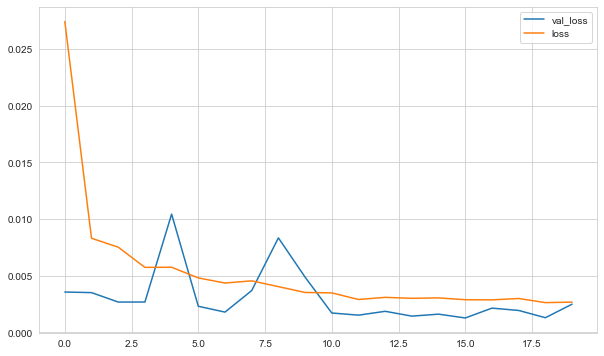

In [81]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [82]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [88]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    current_pred = model.predict(current_batch)

    predictions_scaled.append(current_pred[0]) 

    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [89]:
predictions_scaled

[array([0.2754107], dtype=float32),
 array([0.23843506], dtype=float32),
 array([0.24552825], dtype=float32),
 array([0.33093974], dtype=float32),
 array([0.41799504], dtype=float32),
 array([0.48657984], dtype=float32),
 array([0.53996783], dtype=float32),
 array([0.57004976], dtype=float32),
 array([0.57706296], dtype=float32),
 array([0.53622764], dtype=float32),
 array([0.47367135], dtype=float32),
 array([0.39908737], dtype=float32)]

In [90]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -0.1733638506065407 
mae: 0.11480775952775348 
mse: 0.014632596754418572 
rmse: 0.12096527086076636


### Inverse Transformation and Comparing

In [91]:
predictions = scaler.inverse_transform(predictions_scaled)

In [92]:
compare = test[:12]

In [93]:
compare['Predictions'] = predictions

In [94]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,96.533
2017-11-01,77.438,91.448
2017-12-01,75.812,92.423
2018-01-01,83.434,104.169
2018-02-01,99.490,116.140
2018-03-01,107.315,125.571
2018-04-01,112.431,132.913
2018-05-01,110.354,137.050
2018-06-01,124.584,138.014


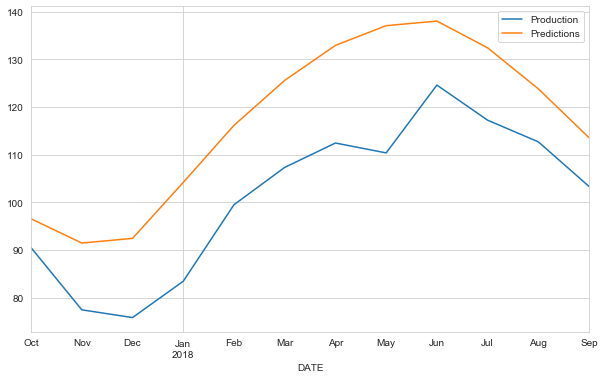

In [95]:
compare.plot()

In [99]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: -0.1733638506065398 
mae: 15.787662762923532 
mse: 276.7034683164838 
rmse: 16.634406160620337


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [100]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [101]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [102]:
len(df)

573

In [103]:
len(generator)

561

In [104]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 26s 46ms/step - loss: 0.0210
Epoch 2/15
561/561 [==============================] - 17s 30ms/step - loss: 0.0050
Epoch 3/15
561/561 [==============================] - 18s 32ms/step - loss: 0.0041
Epoch 4/15
561/561 [==============================] - 16s 28ms/step - loss: 0.0038
Epoch 5/15
561/561 [==============================] - 17s 30ms/step - loss: 0.0039
Epoch 6/15
561/561 [==============================] - 16s 28ms/step - loss: 0.0037
Epoch 7/15
561/561 [==============================] - 17s 30ms/step - loss: 0.0036
Epoch 8/15
561/561 [==============================] - 16s 28ms/step - loss: 0.0034
Epoch 9/15
561/561 [==============================] - 16s 29ms/step - loss: 0.0033
Epoch 10/15
561/561 [==============================] - 16s 29ms/step - loss: 0.0032
Epoch 11/15
561/561 [==============================] - 16s 28ms/step - loss: 0.0033
Epoch 12/15
561/561 [==============================] - 14s 26ms/step - loss: 0.0029
E

In [105]:
scaled_full_data.shape

(573, 1)

In [106]:
scaled_full_data[-length:].shape

(12, 1)

In [107]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):

    current_pred = model.predict(current_batch)

    forecast.append(current_pred[0]) 

    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [108]:
forecast = scaler.inverse_transform(forecast)

In [109]:
forecast

array([[ 85.94182701],
       [ 76.47214318],
       [ 76.12084874],
       [ 82.35262273],
       [ 90.63935143],
       [ 98.07693024],
       [103.89783991],
       [108.21303808],
       [109.75508862],
       [106.33142429],
       [ 98.70076745],
       [ 87.91581088]])

In [110]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [111]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

In [112]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [113]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [114]:
forecast_df

,Forecast
2019-11-01,85.942
2019-12-01,76.472
2020-01-01,76.121
2020-02-01,82.353
2020-03-01,90.639
2020-04-01,98.077
2020-05-01,103.898
2020-06-01,108.213
2020-07-01,109.755
2020-08-01,106.331


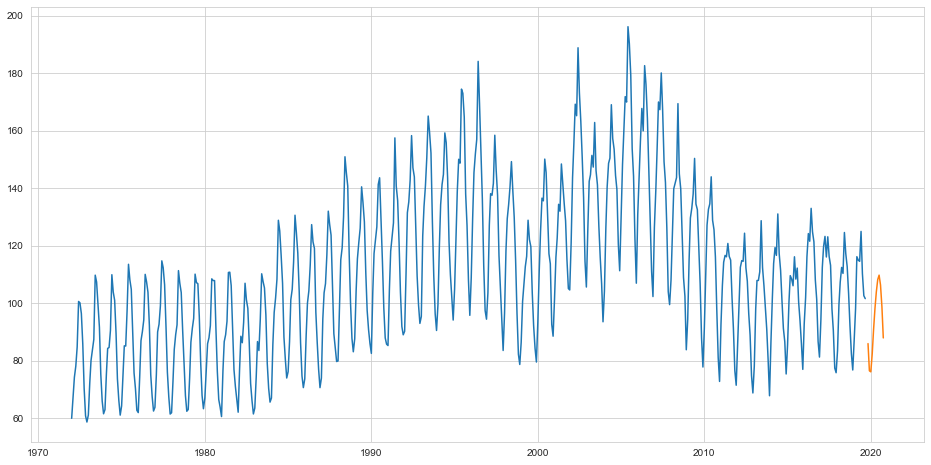

In [116]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

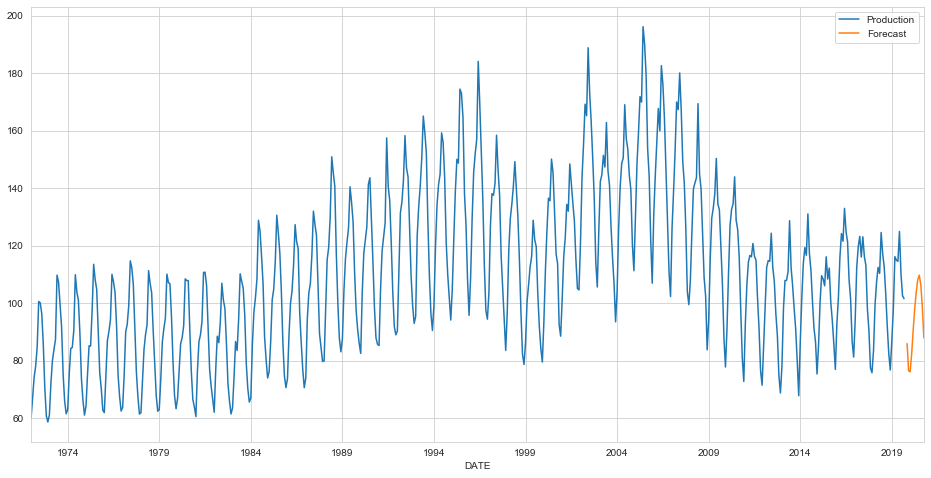

In [117]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576, 611)

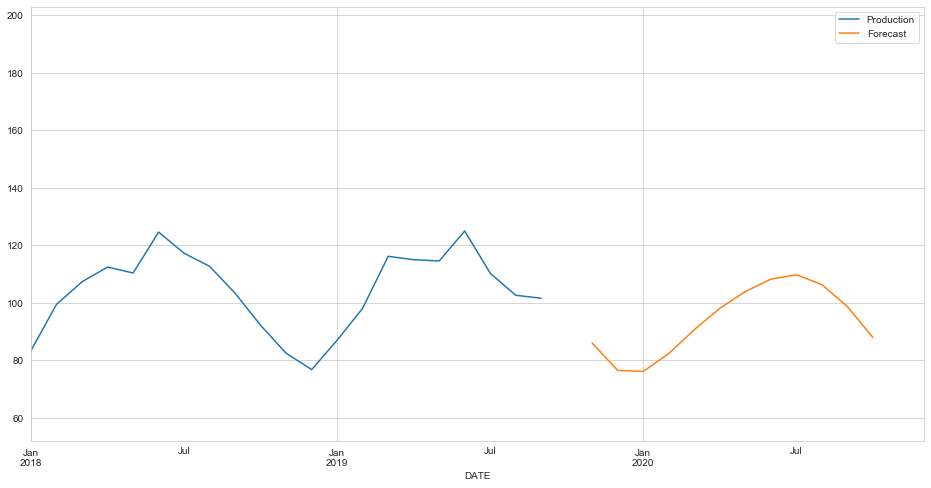

In [118]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [120]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)

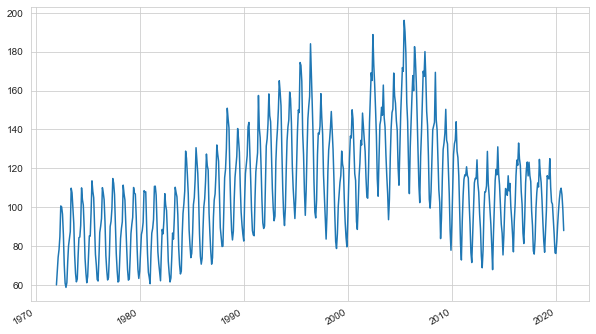

In [121]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___